In [82]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1.core import Laps
from datetime import datetime
from matplotlib.collections import LineCollection
from datetime import timedelta
from fastf1 import utils
import mplcyberpunk
from timple.timedelta import strftimedelta

In [83]:
year=int(input('Enter Year'))
gp=input('Enter the Grand Prix Location')
sessiontypechoice=int(input('Enter 1 for qualifying or 2 for race'))
if sessiontypechoice == 1:
    sessiontype='Q'
elif sessiontypechoice == 2:
    sessiontype='R'
else:
    print("Unknown choice")

session = ff1.get_session(year, gp,sessiontype)
session.load()

if sessiontype=="Q":
    choicedrivers=int(input("Enter 1 for the comparision between top 2 drivers \n Enter 2 for the comparision between 2 specified drivers"))
    if choicedrivers==1: 
        quali_results=session.results
        quali_results=quali_results[['DriverNumber','BroadcastName','Abbreviation','TeamName','Position','Q1','Q2','Q3']]
        quali_results[['Abbreviation']]
        x=quali_results['Abbreviation'].iloc[0]
        y=quali_results['Abbreviation'].iloc[1]
        driver1=x
        driver2=y

    else:
        driver1=input("Enter the first driver initials")
        driver2=input("Enter the second driver initials")
else:
    driver1=input("Enter the first driver initials")
    driver2=input("Enter the second driver initials")

core           INFO 	Loading data for French Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '77', '4', '3', '10', '14', '5', '18', '55', '63', '22', '31', '99', '16', '7', '6', '47', '9']


In [84]:
laps=session.load_laps(with_telemetry=True)

laps_1=laps.pick_driver(driver1)
laps_2=laps.pick_driver(driver2)
if sessiontype == "Q":
    s1=laps_1.pick_fastest()
    s2=laps_2.pick_fastest()
    if s1.LapTime < s2.LapTime:
        fastest_1=s1
        fastest_2=s2
    else:
        fastest_1=s2
        fastest_2=s1
else:
    fastest_1=laps_1.pick_fastest()
    fastest_2=laps_2.pick_fastest()
    

c:\Users\Rajup\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for French Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data

In [85]:
driver1=driver1.upper()
driver2=driver2.upper()

In [86]:
driver3="HAM"

laps_3=laps.pick_driver(driver3)
driver3_racetimes=pd.DataFrame(laps_3.pick_accurate())

In [87]:
driver3_racetimes

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
54,0 days 00:36:50.969000,44,0 days 00:01:39.625000,2,1,NaT,NaT,0 days 00:00:25.264000,0 days 00:00:29.807000,0 days 00:00:44.554000,...,False,MEDIUM,5.0,False,0 days 00:35:11.344000,Mercedes,HAM,1,True,2021-06-20 13:05:11.352
55,0 days 00:38:30.745000,44,0 days 00:01:39.776000,3,1,NaT,NaT,0 days 00:00:25.599000,0 days 00:00:29.859000,0 days 00:00:44.318000,...,False,MEDIUM,6.0,False,0 days 00:36:50.969000,Mercedes,HAM,1,True,2021-06-20 13:06:50.977
56,0 days 00:40:10.437000,44,0 days 00:01:39.692000,4,1,NaT,NaT,0 days 00:00:25.176000,0 days 00:00:29.897000,0 days 00:00:44.619000,...,False,MEDIUM,7.0,False,0 days 00:38:30.745000,Mercedes,HAM,1,True,2021-06-20 13:08:30.753
57,0 days 00:41:49.986000,44,0 days 00:01:39.549000,5,1,NaT,NaT,0 days 00:00:25.177000,0 days 00:00:29.961000,0 days 00:00:44.411000,...,False,MEDIUM,8.0,False,0 days 00:40:10.437000,Mercedes,HAM,1,True,2021-06-20 13:10:10.445
58,0 days 00:43:28.773000,44,0 days 00:01:38.787000,6,1,NaT,NaT,0 days 00:00:25.008000,0 days 00:00:29.724000,0 days 00:00:44.055000,...,False,MEDIUM,9.0,False,0 days 00:41:49.986000,Mercedes,HAM,1,True,2021-06-20 13:11:49.994
59,0 days 00:45:07.977000,44,0 days 00:01:39.204000,7,1,NaT,NaT,0 days 00:00:24.990000,0 days 00:00:29.758000,0 days 00:00:44.456000,...,False,MEDIUM,10.0,False,0 days 00:43:28.773000,Mercedes,HAM,1,True,2021-06-20 13:13:28.781
60,0 days 00:46:46.740000,44,0 days 00:01:38.763000,8,1,NaT,NaT,0 days 00:00:24.992000,0 days 00:00:29.721000,0 days 00:00:44.050000,...,False,MEDIUM,11.0,False,0 days 00:45:07.977000,Mercedes,HAM,1,True,2021-06-20 13:15:07.985
61,0 days 00:48:26.008000,44,0 days 00:01:39.268000,9,1,NaT,NaT,0 days 00:00:25.089000,0 days 00:00:29.831000,0 days 00:00:44.348000,...,False,MEDIUM,12.0,False,0 days 00:46:46.740000,Mercedes,HAM,1,True,2021-06-20 13:16:46.748
62,0 days 00:50:04.786000,44,0 days 00:01:38.778000,10,1,NaT,NaT,0 days 00:00:25.035000,0 days 00:00:29.672000,0 days 00:00:44.071000,...,False,MEDIUM,13.0,False,0 days 00:48:26.008000,Mercedes,HAM,1,True,2021-06-20 13:18:26.016
63,0 days 00:51:43.763000,44,0 days 00:01:38.977000,11,1,NaT,NaT,0 days 00:00:25.104000,0 days 00:00:29.755000,0 days 00:00:44.118000,...,False,MEDIUM,14.0,False,0 days 00:50:04.786000,Mercedes,HAM,1,True,2021-06-20 13:20:04.794


In [88]:
# testing first the individual race pace 
# driver1_racetimes=pd.DataFrame(laps_1.pick_accurate())
# driver2_racetimes=pd.DataFrame(laps_2.pick_accurate())



# driver1_racetimes
# #average race pace



# n=timedelta(seconds=0)




# for index, row in driver1_racetimes.iterrows():
    
#     n+=row["LapTime"]
   
# print(n)

# print(driver1+"  : Race Pace : "+str(n/len(driver1_racetimes)))


# from datetime import timedelta

# n1=timedelta(seconds=0)
# for index, row in driver2_racetimes.iterrows():
    
#     n1+=row["LapTime"]
   
# print(n1)


# print(driver2+"  : Race Pace : "+str(n1/len(driver2_racetimes)))

# driver2
# laps_1.pick_tyre("HARD")




# n2=timedelta(seconds=0)
# for index, row in driver3_racetimes.iterrows():
    
#     n2+=row["LapTime"]
   
# print(n2)


# print(driver3+"  : Race Pace : "+str(n2/len(driver3_racetimes)))

# driver1_racetimes
# #average race pace

# n=timedelta(seconds=0)

# for index, row in driver1_racetimes.iterrows():
    
#     n+=row["LapTime"]
   
# print(n)

# print(driver1+"  : Race Pace : "+str(n/len(driver1_racetimes)))
    

In [89]:
sessiondf=pd.DataFrame(session.results)

In [90]:
drivernumber_list=sessiondf['DriverNumber'].tolist()

In [91]:
drivernumber_list

['33',
 '44',
 '11',
 '77',
 '4',
 '3',
 '10',
 '14',
 '5',
 '18',
 '55',
 '63',
 '22',
 '31',
 '99',
 '16',
 '7',
 '6',
 '47',
 '9']

In [92]:
fastest_1.Driver

'VER'

In [93]:
indexes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [94]:
# Creating a new variable for each dataframe 
index=1
for i in drivernumber_list:
    
    temp=laps.pick_driver(i)
    temp2=temp.pick_fastest()
    getdrivername=temp2.Driver
    globals()['Driver%s' % index] = laps.pick_driver(getdrivername)
    # assigning only the laps which doesn't involve safety laps and involve 
    #also eliminates the in/out laps
    globals()['Driver%s' % index]=pd.DataFrame(globals()['Driver%s' % index].pick_accurate())
  
    index=index+1
   
    

In [95]:
# Creating a list from 1 to 20 
# So that this can be used to loop from driver 1
looper = list(range(1,20+1))

In [129]:
# creation of empty dataframe for plotting purpose 
racepace_df_compound=pd.DataFrame({'Driver':[],
                   'DriverNumber':[],
                   'RacePace':[],
                   'Team':[],
                   'TeamColor':[]})

In [130]:
# Creating a loop to iterate through all the drivers
#  and get their average race pace

for i in looper:
    globals()['n%s' % i]=timedelta(seconds=0)
    
    for index, row in globals()['Driver%s' % i].iterrows():
    
        globals()['n%s' % i]+=row["LapTime"]

    # get the driver names 
    driver_name=globals()['Driver%s' % i].Driver.head(1).tolist()
    driver_name=driver_name[0]
    # driver number
    driver_number=globals()['Driver%s' % i].DriverNumber.head(1).tolist()
    driver_number=driver_number[0]
    # driver team
    driver_team=globals()['Driver%s' % i].Team.head(1).tolist()
    driver_team=driver_team[0]
    # team color
    driver_team_color=ff1.plotting.team_color(driver_team)
    

    globals()['average_racepace%s' % driver_name]=(globals()['n%s' % i]/len(globals()['Driver%s' % i]))

    print("Average Race Pace of  "+driver_name+" in "+ session.event['EventName']+" : "+str(globals()['average_racepace%s' % driver_name]))
    #adding a row with the data
    data=[{'Driver': driver_name,'DriverNumber':driver_number,'RacePace':globals()['average_racepace%s' % driver_name],'Team':driver_team,'TeamColor': str(driver_team_color)}]
    # data added to DataFrame 
    racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)

Average Race Pace of  VER in French Grand Prix : 0 days 00:01:38.003000
Average Race Pace of  HAM in French Grand Prix : 0 days 00:01:38.465160
Average Race Pace of  PER in French Grand Prix : 0 days 00:01:38.527380
Average Race Pace of  BOT in French Grand Prix : 0 days 00:01:38.683820
Average Race Pace of  NOR in French Grand Prix : 0 days 00:01:39.493040


C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be remove

Average Race Pace of  RIC in French Grand Prix : 0 days 00:01:39.764280
Average Race Pace of  GAS in French Grand Prix : 0 days 00:01:39.778940
Average Race Pace of  ALO in French Grand Prix : 0 days 00:01:39.784360
Average Race Pace of  VET in French Grand Prix : 0 days 00:01:39.811480
Average Race Pace of  STR in French Grand Prix : 0 days 00:01:39.994740
Average Race Pace of  SAI in French Grand Prix : 0 days 00:01:40.248520
Average Race Pace of  RUS in French Grand Prix : 0 days 00:01:40.334836734

C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be remove


Average Race Pace of  TSU in French Grand Prix : 0 days 00:01:40.336122448
Average Race Pace of  OCO in French Grand Prix : 0 days 00:01:40.450877551
Average Race Pace of  GIO in French Grand Prix : 0 days 00:01:40.525979591
Average Race Pace of  LEC in French Grand Prix : 0 days 00:01:40.202127659
Average Race Pace of  RAI in French Grand Prix : 0 days 00:01:40.632122448

C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be remove


Average Race Pace of  LAT in French Grand Prix : 0 days 00:01:40.640224489
Average Race Pace of  MSC in French Grand Prix : 0 days 00:01:41.120938775
Average Race Pace of  MAZ in French Grand Prix : 0 days 00:01:41.399387755


C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\1504020820.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df_compound=racepace_df_compound.append(data,ignore_index=True,sort=False)


In [98]:
x=Driver1.Team[1]

In [131]:
racepace_df_compound

,Driver,DriverNumber,RacePace,Team,TeamColor
0,VER,33,0 days 00:01:38.003000,Red Bull Racing,#0600ef
1,HAM,44,0 days 00:01:38.465160,Mercedes,#00d2be
2,PER,11,0 days 00:01:38.527380,Red Bull Racing,#0600ef
3,BOT,77,0 days 00:01:38.683820,Mercedes,#00d2be
4,NOR,4,0 days 00:01:39.493040,McLaren,#ff8700
5,RIC,3,0 days 00:01:39.764280,McLaren,#ff8700
6,GAS,10,0 days 00:01:39.778940,AlphaTauri,#2b4562
7,ALO,14,0 days 00:01:39.784360,Alpine,#0090ff
8,VET,5,0 days 00:01:39.811480,Aston Martin,#006f62
9,STR,18,0 days 00:01:39.994740,Aston Martin,#006f62


In [100]:
# add colors to a list of all the teams
team_colors = list()
for index,lap in racepace_df.iterrows():
    colors=lap["TeamColor"]
    team_colors.append(colors)

In [101]:
fastest_pace=timedelta(seconds=0)
tempss=timedelta(seconds=0)

In [102]:
#calculating the fastest race pace
for index,pace in racepace_df.iterrows():
    nexts=pace['RacePace']
    if (fastest_pace==tempss) or (fastest_pace > nexts):
        fastest_pace = pace['RacePace']
    

In [103]:
fastest_pace

Timedelta('0 days 00:01:38.003000')

In [104]:
racepace_df['Delta']=racepace_df['RacePace'] - fastest_pace

In [105]:
path="D:/Python Projects/f1analysis/Visualisations/"

In [106]:
deltalist=list()
for index, deltas in racepace_df.iterrows():
    delta=deltas['Delta']
    delta=strftimedelta(delta, '%s.%ms')

    deltalist.append(delta)


In [107]:
racepace_df.index=racepace_df.index+1

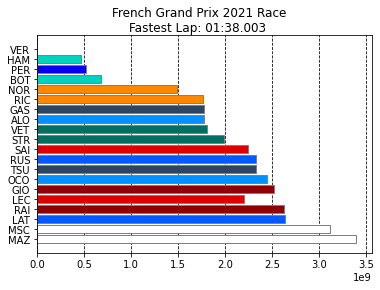

In [108]:
fig, ax = plt.subplots()
ax.barh(racepace_df.index, racepace_df['Delta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(racepace_df.index)
ax.set_yticklabels(racepace_df['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(fastest_pace, '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} {session.name}\n"
             f"Fastest Lap: {lap_time_string} ")
fig.savefig(path+session.event['EventName']+" racepace.jpg")

plt.show()

In [109]:
fig, ax = plt.subplots()

ax.barh(racepace_df.index, racepace_df['Delta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(racepace_df.index)
ax.set_yticklabels(racepace_df['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(fastest_pace, '%m:%s.%ms')

for i, v in enumerate(deltalist):
        ax.text(1, i+1.3, "+" +str(v),color = 'black', fontweight = 'bold')

plt.suptitle(f"{session.event['EventName']} {session.event.year} {session.name}\n"
             f"Fastest Lap: {lap_time_string} ")
fig.set_size_inches(16, 10)
fig.set_dpi(800)
fig.savefig(path+session.event['EventName']+" racepace.jpg",dpi=800)

plt.show()


In [110]:
vertime=laps.pick_driver("VER")
hamtime=laps.pick_driver("HAM")

In [111]:
medi=vertime.pick_tyre("MEDIUM")
medi2=hamtime.pick_tyre("MEDIUM")

In [112]:
medi=medi.pick_accurate()
medi2=medi2.pick_accurate()

In [113]:
drivernumber_list

['33',
 '44',
 '11',
 '77',
 '4',
 '3',
 '10',
 '14',
 '5',
 '18',
 '55',
 '63',
 '22',
 '31',
 '99',
 '16',
 '7',
 '6',
 '47',
 '9']

In [114]:
tyrecompound="HARD"

In [115]:
#similar code as above but adding the part where we select the laps with medium compound
index=1
for i in drivernumber_list:
    
    temp_compund=laps.pick_driver(i)
    #code to assign driver name
    temp2_compound=temp_compund.pick_fastest()
    getdrivername=temp2_compound.Driver
    globals()['Driver%s_%s' % (index,tyrecompound)] = laps.pick_driver(getdrivername)
    # assigning only the laps which doesn't involve safety laps and involve 
    #also eliminates the in/out laps
    globals()['Driver%s_%s' % (index,tyrecompound)] = globals()['Driver%s_%s' % (index,tyrecompound)].pick_tyre(tyrecompound)
    globals()['Driver%s_%s' % (index,tyrecompound)]=pd.DataFrame(globals()['Driver%s_%s' % (index,tyrecompound)].pick_accurate())
  
    index=index+1

In [116]:
test1=laps.pick_tyre("MEDIUM")
test1=test1.pick_accurate()
test1=test1.pick_driver("VER")

In [117]:
test1

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 00:36:52.424000,33,0 days 00:01:39.613000,2,1,NaT,NaT,0 days 00:00:25.323000,0 days 00:00:29.545000,0 days 00:00:44.745000,...,False,MEDIUM,5.0,False,0 days 00:35:12.811000,Red Bull Racing,VER,1,True,2021-06-20 13:05:12.819
2,0 days 00:38:31.995000,33,0 days 00:01:39.571000,3,1,NaT,NaT,0 days 00:00:25.417000,0 days 00:00:29.755000,0 days 00:00:44.399000,...,False,MEDIUM,6.0,False,0 days 00:36:52.424000,Red Bull Racing,VER,1,True,2021-06-20 13:06:52.432
3,0 days 00:40:12.019000,33,0 days 00:01:40.024000,4,1,NaT,NaT,0 days 00:00:25.489000,0 days 00:00:29.675000,0 days 00:00:44.860000,...,False,MEDIUM,7.0,False,0 days 00:38:31.995000,Red Bull Racing,VER,1,True,2021-06-20 13:08:32.003
4,0 days 00:41:51.427000,33,0 days 00:01:39.408000,5,1,NaT,NaT,0 days 00:00:25.362000,0 days 00:00:29.678000,0 days 00:00:44.368000,...,False,MEDIUM,8.0,False,0 days 00:40:12.019000,Red Bull Racing,VER,1,True,2021-06-20 13:10:12.027
5,0 days 00:43:30.154000,33,0 days 00:01:38.727000,6,1,NaT,NaT,0 days 00:00:25.092000,0 days 00:00:29.444000,0 days 00:00:44.191000,...,False,MEDIUM,9.0,False,0 days 00:41:51.427000,Red Bull Racing,VER,1,True,2021-06-20 13:11:51.435
6,0 days 00:45:09.584000,33,0 days 00:01:39.430000,7,1,NaT,NaT,0 days 00:00:25.114000,0 days 00:00:29.546000,0 days 00:00:44.770000,...,False,MEDIUM,10.0,False,0 days 00:43:30.154000,Red Bull Racing,VER,1,True,2021-06-20 13:13:30.162
7,0 days 00:46:48.643000,33,0 days 00:01:39.059000,8,1,NaT,NaT,0 days 00:00:25.185000,0 days 00:00:29.680000,0 days 00:00:44.194000,...,False,MEDIUM,11.0,False,0 days 00:45:09.584000,Red Bull Racing,VER,1,True,2021-06-20 13:15:09.592
8,0 days 00:48:27.765000,33,0 days 00:01:39.122000,9,1,NaT,NaT,0 days 00:00:25.138000,0 days 00:00:29.609000,0 days 00:00:44.375000,...,False,MEDIUM,12.0,False,0 days 00:46:48.643000,Red Bull Racing,VER,1,True,2021-06-20 13:16:48.651
9,0 days 00:50:06.715000,33,0 days 00:01:38.950000,10,1,NaT,NaT,0 days 00:00:25.213000,0 days 00:00:29.475000,0 days 00:00:44.262000,...,False,MEDIUM,13.0,False,0 days 00:48:27.765000,Red Bull Racing,VER,1,True,2021-06-20 13:18:27.773
10,0 days 00:51:45.929000,33,0 days 00:01:39.214000,11,1,NaT,NaT,0 days 00:00:25.393000,0 days 00:00:29.588000,0 days 00:00:44.233000,...,False,MEDIUM,14.0,False,0 days 00:50:06.715000,Red Bull Racing,VER,1,True,2021-06-20 13:20:06.723


In [118]:
racepace_df_compound=pd.DataFrame({'Driver':[],
                   'DriverNumber':[],
                   'RacePace':[],
                   'Team':[],
                   'TeamColor':[]})

In [119]:
# Creating a loop to iterate through all the drivers
#  and get their average race pace

for i in looper:
    print(i)
    globals()['n%s' % i]=timedelta(seconds=0)
    
    for index, row in globals()['Driver%s_%s' % (i,tyrecompound)].iterrows():
    
        globals()['n%s' % i]+=row["LapTime"]

    # get the driver names 
    driver_name=globals()['Driver%s_%s' % (i,tyrecompound)].Driver.head(1).tolist()
    driver_name=driver_name[0]
    # driver number
    driver_number=globals()['Driver%s_%s' % (i,tyrecompound)].DriverNumber.head(1).tolist()
    driver_number=driver_number[0]
    # driver team
    driver_team=globals()['Driver%s_%s' % (i,tyrecompound)].Team.head(1).tolist()
    driver_team=driver_team[0]
    # team color
    driver_team_color=ff1.plotting.team_color(driver_team)
    
    tests=globals()['Driver%s_%s' % (i,tyrecompound)]
    globals()['average_racepace%s' % driver_name]=(globals()['n%s' % i]/len(tests))

    print("Average Race Pace of  "+driver_name+" in "+ session.event['EventName']+" : "+str(globals()['average_racepace%s' % driver_name]))
    #adding a row with the data
    
    data=[{'Driver': driver_name,'DriverNumber':driver_number,'RacePace':globals()['average_racepace%s' % driver_name],'Team':driver_team,'TeamColor': str(driver_team_color)}]
    # data added to DataFrame 
 
    racepace_df=racepace_df.append(data,ignore_index=True,sort=False)

1
Average Race Pace of  VER in French Grand Prix : 0 days 00:01:37.785833333
2
Average Race Pace of  HAM in French Grand Prix : 0 days 00:01:38.074272727
3
Average Race Pace of  PER in French Grand Prix : 0 days 00:01:37.694250
4
Average Race Pace of  BOT in French Grand Prix : 0 days 00:01:38.338171428
5
Average Race Pace of  NOR in French Grand Prix : 0 days 00:01:38.507500
6
Average Race Pace of  RIC in French Grand Prix : 0 days 00:01:39.309972222
7
Average Race Pace of  GAS in French Grand Prix : 0 days 00:01:39.274142857

C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i


8
Average Race Pace of  ALO in French Grand Prix : 0 days 00:01:39.036970588
9
Average Race Pace of  VET in French Grand Prix : 0 days 00:01:40.603228571
10
Average Race Pace of  STR in French Grand Prix : 0 days 00:01:40.815343750
11
Average Race Pace of  SAI in French Grand Prix : 0 days 00:01:39.947428571
12
Average Race Pace of  RUS in French Grand Prix : 0 days 00:01:39.737323529
13
Average Race Pace of  TSU in French Grand Prix : 0 days 00:01:39.950166666

C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i


14
Average Race Pace of  OCO in French Grand Prix : 0 days 00:01:41.429461538
15
Average Race Pace of  GIO in French Grand Prix : 0 days 00:01:41.438115384
16
Average Race Pace of  LEC in French Grand Prix : 0 days 00:01:40.340636363
17
Average Race Pace of  RAI in French Grand Prix : 0 days 00:01:41.502354838
18
Average Race Pace of  LAT in French Grand Prix : 0 days 00:01:40.061606060
19
Average Race Pace of  MSC in French Grand Prix : 0 days 00:01:40.562666666
20
Average Race Pace of  MAZ in French Grand Prix : 0 days 00:01:42.175137931


C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_28644\2904565619.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [120]:
for i in looper:
    print(i)
    globals()['a%s' % i]=timedelta(seconds=0)
    for index, row in globals()['Driver%s_%s' % (i,tyrecompound)].iterrows():
        
        globals()['a%s' % i]+=row["LapTime"]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
